In [1]:
import numpy as np
import pandas as pd
import time
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from datetime import datetime, timedelta
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
import argparse
import sys
import json
import ssl
import urllib.request
from easydict import EasyDict as easydict

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] [0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 4.0, 5.0, 7.0, 12.0, 15.0, 16.0, 19.0, 26.0, 28.0, 39.0, 49.0, 53.0, 56.0, 56.0, 59.0, 59.0, 59.0, 64.0, 75.0, 90.0, 94.0, 97.0, 100.0, 104.0, 105.0, 117.0, 118.0, 125.0, 137.0, 145.0, 149.0, 162.0]


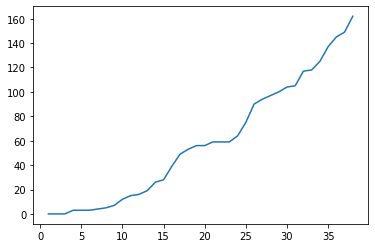

In [2]:
doc = pd.read_excel('Casos covid por provincias.xlsx')
doc = doc[doc['Provincia'].isin(['Cañar'])]

start_date = "16/3/2020"
confirmed=doc.iloc[0].loc[start_date:]
confirmed
x=[]
y=[]
for i in range(len(list(confirmed))):
    x.append(i+1)
confirmed=list(confirmed)
for i in confirmed:
    if str(i)=='nan':
        y.append(0.)
    else:
        y.append(float(i))
print(x,y)
plt.plot(x,y)
plt.show()

# Modelo Lineal

Coefficients: 
 [4.39687055]
Independent term: 
 -26.44950213371265
[1, 38, 39, 40, 41, 42, 43, 44, 45] [0.0, 140.6315789473684, 145.0284495021337, 149.425320056899, 153.8221906116643, 158.21906116642958, 162.61593172119487, 167.01280227596015, 171.40967283072544]


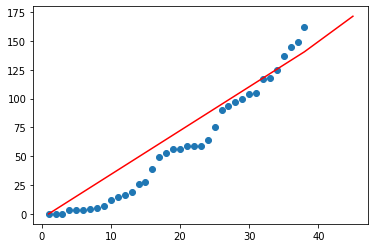

In [3]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
xp=[x[0]]
yp=[y[0]]
for i in range(len(y),46):
    xp.append(i)
    yp.append(float(regr.predict([[i]])))
    

print(xp, yp)
plt.scatter(x,y)
plt.plot(xp,yp,color='red')
plt.show()

# Modelo Logistico

In [4]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-69.95415621,  47.69684235]), array([[225.99110647, -75.80108841],
       [-75.80108841,  27.97408743]]))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


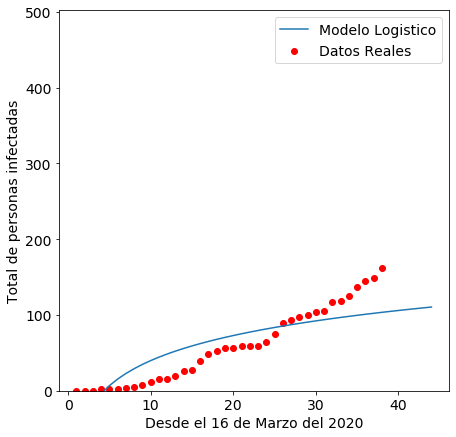

In [5]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
print(pred_x)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 16 de Marzo del 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

# Modelo Exponencial

In [6]:
def funcion(x,a,b):
    return a*np.exp(b*x)
val=curve_fit( funcion,  x,  y)
print(val)
predex_x = list(range(min(x),max(x)+7))

(array([11.39041161,  0.07145605]), array([[ 1.57809346e+00, -4.19836148e-03],
       [-4.19836148e-03,  1.16429424e-05]]))


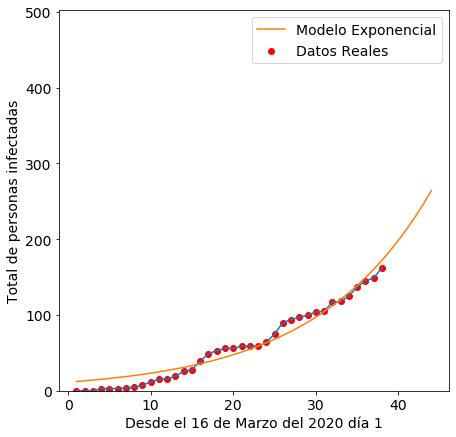

In [7]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(x, y)
plt.plot(pred_x, [funcion(i,val[0][0],val[0][1]) for i in pred_x], label="Modelo Exponencial" )
plt.legend()
plt.xlabel("Desde el 16 de Marzo del 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1))
plt.show()

# Modelo Polinomial

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

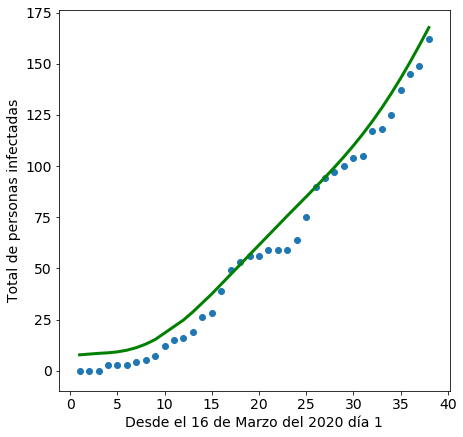

In [9]:
titulos=["Grado 0 ", "Grado 1", "Grado 2", "Grado 3", "Grado 4", "Grado 5", "Grado 6"]
    
poli_reg=PolynomialFeatures(degree=6)
X_train_poli = poli_reg.fit_transform(X_train)
X_test_p = poli_reg.fit_transform(X_test)
pr = linear_model.LinearRegression()
pr.fit(X_train_poli, y_train)
Y_predic = pr.predict(X_train_poli+7)
xt,yt=zip(*sorted(zip(X_train,Y_predic)))
plt.xlabel("Desde el 16 de Marzo del 2020 día 1")
plt.ylabel("Total de personas infectadas")
plt.plot(xt, yt, color='green', label='Grado 6', lineWidth=3)
plt.scatter(x,y, label="Modelo Polinomial")
plt.show()

# Cálculo del Betta y Gamma con el SIR

16/3/2020       0
17/3/2020       0
18/3/2020       0
19/3/2020       3
20/3/2020       3
21/3/2020       3
22/3/2020       4
23/3/2020       5
24/3/2020       7
25/3/2020      12
26/3/2020      15
27/3/2020      16
28/3/2020      19
29/3/2020      26
30/3/2020      28
31/3/2020      39
1/4/2020       49
2/4/2020       53
3/4/2020       56
4/4/2020       56
5/4/2020       59
6/4/2020       59
7/4/2020       59
8/4/2020       64
9/4/2020       75
10/4/2020      90
11/4/2020      94
12/4/2020      97
13/4/2020     100
14/4/2020     104
15/4/2020     105
16/4/2020     117
17/4/2020     118
18/4/2020     125
19/4/2020     137
20/4/2020     145
21/04/2020    149
22/04/2020    162
Name: 2, dtype: object


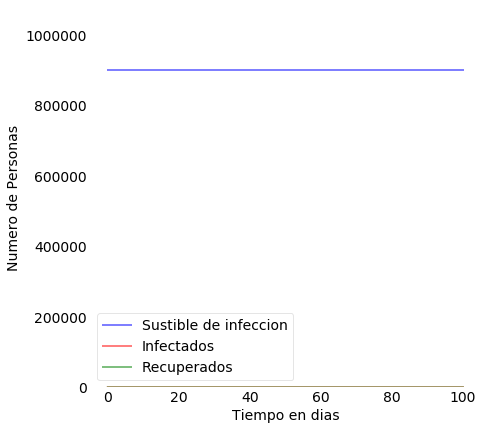

Beta:  0.26531940697009765 Gamma: 8178.08170856372
R0:  3.244274347274705e-05


In [10]:
from scipy.integrate import odeint
def loss(point, data, recovered, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2


url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
country_df = df[df['Provincia'] == "Cañar"]
confirmed = country_df.iloc[0].loc['16/3/2020':]
#print(confirmed.values)
#print(confirmed)
for i in range(len(confirmed.values)):
    #print(str(confirmed.values[i]))
    if str(confirmed.values[i])=='nan':
        confirmed.values[i]=0
print(confirmed)
data = (confirmed)

# Total de la poblacion
N = 900000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0



optimal = minimize(loss, [0.001, 0.001], args=(data, confirmed, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = optimal.x


beta *= 1000000
gamma *= 100000
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 100, 100)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
fig.savefig(f"Cañar.png")
print("Beta: ",beta, "Gamma:",gamma)
Ro = beta/gamma
print('R0: ',Ro)

### El r0 es bajo por lo cual calculamos el RE

# Simulacion de muertes
## RE = 29.19

In [11]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = Ro * N # Factor R0 para la simulacion COVID probabilidad en base al SIR anterior trabajo
print('RE: ',CONTAGION_RATE)
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 25 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 250 #Numero de filas
nb_cols = 250 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertos de la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador
def contar_sucep():
    contadori = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] >= 10 and states[x][y] <= 20:
                contadori +=  1
    return contadori
def contar_recuperados():
    contadorr = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 1:
                contadorr +=  1
    return contadorr

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
total_recup = 0
total_suceptibles = 0
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((1200,1000),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Cañar")# Titulo
font=pygame.font.SysFont('Calibri', 15) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        total_recup=contar_recuperados()
        total_suceptibles=contar_sucep()
        
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    textsurface1 = font.render("Total Recuperados: "+ str(total_recup), False, (255,160,122)) #El numero de muertos
    textsurface2 = font.render("Total Suceptibles: "+ str(total_suceptibles), False, (255,160,122)) #El numero de muertos
    print('Muertos: ',total_muerte)
    print('Recuperados: ',total_recup)
    print('Suceptibles: ',total_suceptibles)
    display.blit(textsurface, (100, 10)) # Graficar el texto de muertes
    display.blit(textsurface1, (300, 10)) # Graficar el texto de muertes
    display.blit(textsurface2, (500, 10)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (10 + x * 4 + 5, 40 + y * 8 + 5), 2)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana



pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
RE:  29.198469125472343
Muertos:  0
Recuperados:  0
Suceptibles:  0
Muertos:  0
Recuperados:  0
Suceptibles:  2
Muertos:  0
Recuperados:  0
Suceptibles:  6
Muertos:  0
Recuperados:  0
Suceptibles:  11
Muertos:  0
Recuperados:  0
Suceptibles:  20
Muertos:  0
Recuperados:  0
Suceptibles:  31
Muertos:  0
Recuperados:  0
Suceptibles:  50
Muertos:  0
Recuperados:  0
Suceptibles:  72
Muertos:  0
Recuperados:  0
Suceptibles:  94
Muertos:  0
Recuperados:  0
Suceptibles:  119
Muertos:  0
Recuperados:  0
Suceptibles:  146
Muertos:  0
Recuperados:  2
Suceptibles:  174
Muertos:  1
Recuperados:  3
Suceptibles:  201
Muertos:  1
Recuperados:  8
Suceptibles:  239
Muertos:  1
Recuperados:  13
Suceptibles:  283
Muertos:  4
Recuperados:  23
Suceptibles:  328
Muertos:  6
Recuperados:  33
Suceptibles:  378
Muertos:  8
Recuperados:  54
Suceptibles:  425
Muertos:  12
Recuperados:  73
Suceptibles:  471
Muertos:  15
Recuperado

error: video system not initialized

## Mi total de Muertos es 5559, Recuperados = 56939 y Susceptibles = 0

# Comparación entre los Modelos:
    Para mi el mejor modelo es el polinomial ya que se asemeja mucho mas a la realidad de los daos presentados y las predicciones resultan mucho mas eficientes, generando graficos casi exactos con un margen de error minimo con respecto al de los otros modelos.

    Una ventaja de los modelos es que su implementacion no es complicada, se basa en parametros matemáticos y su desventaja es que dependiendo el caso se debe hacer un análisis para ver el mejor ya que si no se tiene datos exactos no se sabra cual es el que mejor se asemeja a la realidad.


  